In [ ]:
'''_In this script, we ..._'''

In [ ]:
# -*- coding: utf-8 -*- #
# Authors: gracecaj@stud.ntnu.no, sbaarak@stud.ntnu.no, & annakale@stud.ntnu.no
# Date: 19/09/2023

In [1]:
#%%
#* Import the code needed
import os
import pandas as pd
from pathlib import Path
import numpy as np
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [2]:
#%%
#* Define paths
directory_path = Path('../../')

In [12]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

import natural_cubic_spline_stack_overflow as ncs
import logistic_curve_function as logistic
  


# Import the cleaned and concatenated datasets

In [3]:
historical_PpD = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'PpD' / 'historical_PpD.xlsx',
    index_col=0)

# Test Regression types on the historical data, pick the best

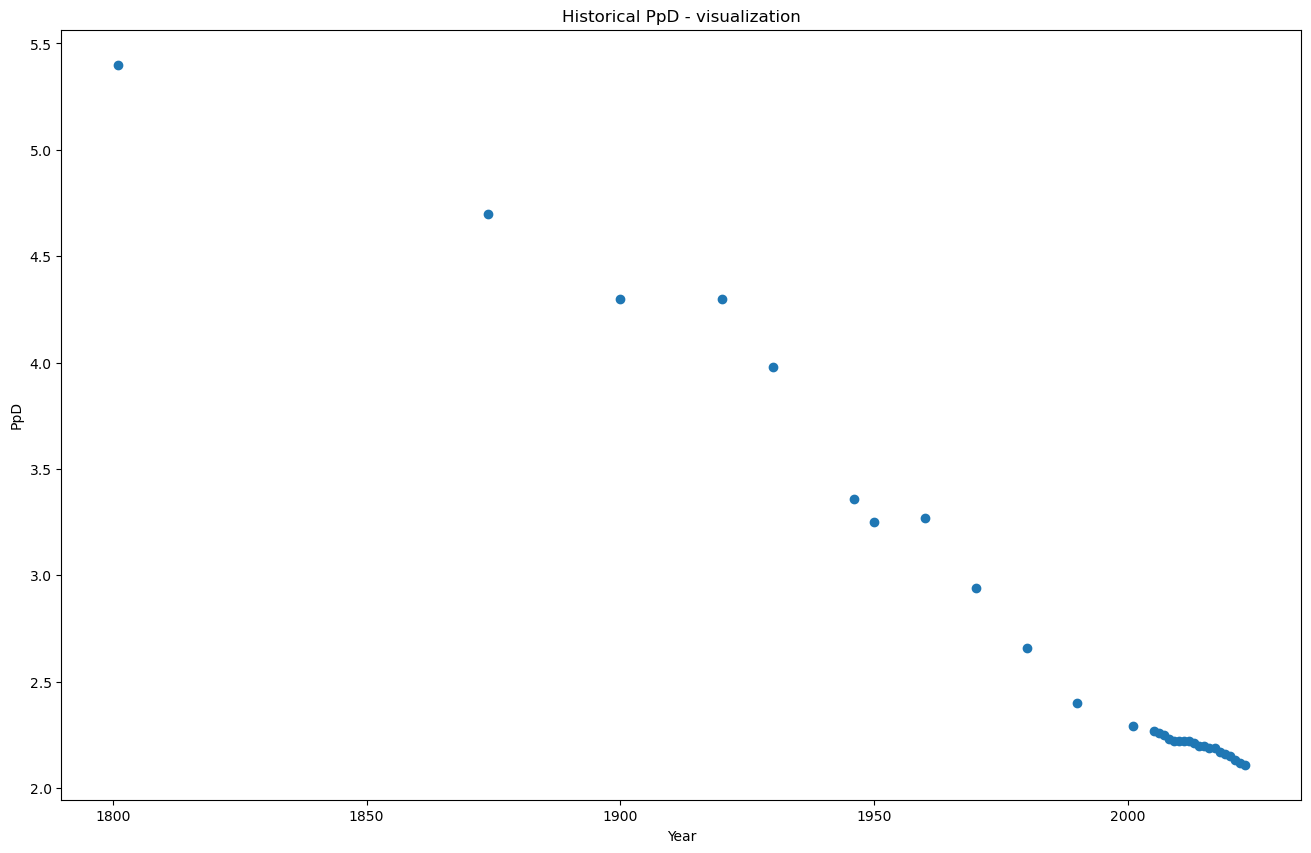

In [13]:
plt.figure(figsize=(16,10))
plt.scatter(historical_PpD.index, historical_PpD['PpD'])
plt.xlabel('Year')
plt.ylabel('PpD')
plt.title('Historical PpD - visualization')
plt.show()

In [ ]:
#* Linear Regression of PpD

<class 'numpy.ndarray'>


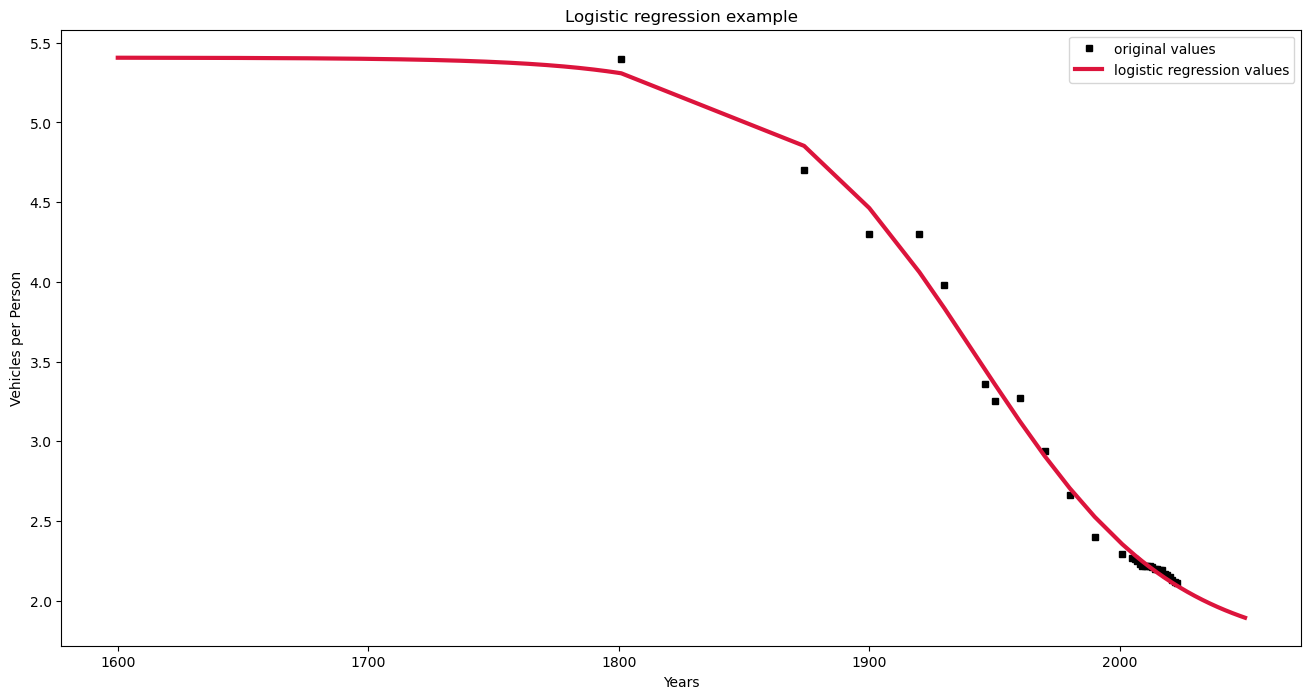

In [44]:
#* Logistic Regression of PpD

oj_years_PpD = historical_PpD.index
oj_values_PpD = historical_PpD['PpD']

#__________________

#___________________________
inputs = oj_years_PpD
outputs = oj_values_PpD

early_years = np.array(np.arange(1600, 1800, 1, dtype=int))
prelim_append = np.append(early_years, oj_years_PpD)
pred_inputs_l_PpD = np.append(prelim_append, np.arange(2024, 2051, 1, dtype=int))



# it might be necessary to adjust the bounds argument, 
# determining the extreme acceptable value for the parameters of the logistic function.
# Bounds are set as ([low_ti, low_tau, low_Co, low_C1],[high_ti,high_tau, high_Co, high_C1 ])
popt, pcov = curve_fit(logistic.logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 10**6, 10**5, 10**6]))
pred_outputs_l_PpD = logistic.logistic(pred_inputs_l_PpD, *popt)

fig=plt.figure(figsize = (16,8))
plt.plot(oj_years_PpD, oj_values_PpD, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs_l_PpD, pred_outputs_l_PpD, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(pred_inputs_l_PpD[:limit_pred:int(len(oj_values_PpD)/10)]))
plt.xlabel('Years')
plt.ylabel('Vehicles per Person')
plt.title('Logistic regression example')
plt.show()

In [ ]:
#* NCS Regression of PpD



# Export the regressed parameter data to excel

In [ ]:
regression_PpD.to_excel(directory_path / 
                 'data/regression_data/PpD/regression_PpD.xlsx')